## 1.Import Necessary Modules & Data Collection

In [3]:
import pandas as pd

In [4]:
pd.read_csv("StudentPerformanceFactors.csv")

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## 2.Data Preparation

In [5]:
Student_Tracker = pd.read_csv("StudentPerformanceFactors.csv")

In [6]:
Student_Tracker.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
del Student_Tracker["Physical_Activity"]

In [8]:
Student_Tracker

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,No,High School,Far,Female,68


In [9]:
Student_Performance_Tracker = Student_Tracker[["Hours_Studied","Exam_Score"]].head(20)

In [10]:
Student_Performance_Tracker

,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74
3,29,71
4,19,70
5,19,71
6,29,67
7,25,66
8,17,69
9,23,72


## 3.Now Check for Assumptions 

#### 1.Normality Check

<Axes: ylabel='Frequency'>

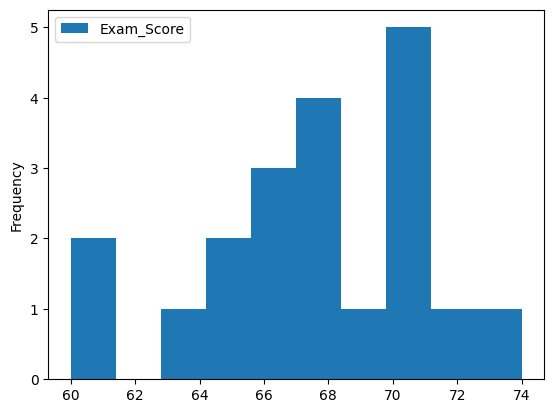

In [11]:
Student_Performance_Tracker.plot(kind = "hist",x ="Hours_Studied" )

#### 2.Linearity Test (Scatter Plot)

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

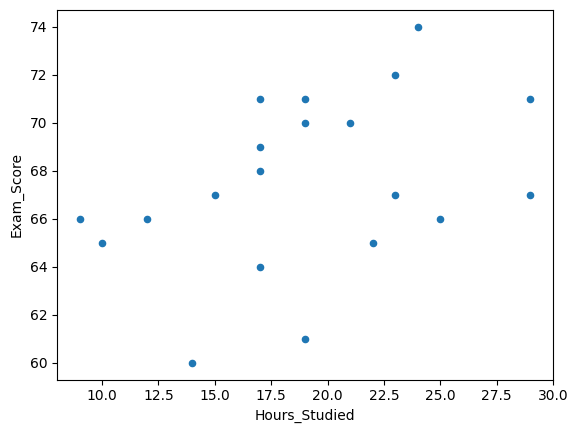

In [12]:
Student_Performance_Tracker.plot(x = "Hours_Studied",y = "Exam_Score", kind = "scatter")

#### 3.Muliticolinearity

In [13]:
Student_Performance_Tracker.corr()

,Hours_Studied,Exam_Score
Hours_Studied,1.000000,0.394861
Exam_Score,0.394861,1.000000


In [14]:
Student_Performance_Tracker.to_csv(path_or_buf = "Student_Performance_Tracker")

#### 4.No Autoegression (Time & Series)

#### 5.Homoscasdacity Test
#### 6.Zero Residual Test

*It will performed during post model training!*

## 4.Model Building

In [15]:
x = Student_Performance_Tracker[["Hours_Studied"]]
y = Student_Performance_Tracker["Exam_Score"]



## 5.Model Training

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
Linear_Model = LinearRegression()

In [18]:
Linear_Model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
Linear_Model.coef_

array([0.25381567])

In [20]:
Linear_Model.intercept_

np.float64(62.664811535542626)

## 6.Model Testing:

#### Manual Testing:

In [21]:
# y = mx + c
# mx = 0.25381567
# c = 0.25381567

y = 0.25381567*10 + 62.664811535542626

In [22]:
y

65.20296823554263

#### Automation

In [23]:
first_test = pd.DataFrame(data = [10,20,50,25,5])

In [24]:
first_test

,0
0,10
1,20
2,50
3,25
4,5


In [25]:
Linear_Model.predict(first_test)

C:\Users\jagan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65.20296821, 67.74112488, 75.35559491, 69.01020322, 63.93388987])

In [26]:
y_pred = Linear_Model.predict(first_test)

C:\Users\jagan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
y_pred

array([65.20296821, 67.74112488, 75.35559491, 69.01020322, 63.93388987])

In [28]:
Marks = Linear_Model.predict(x)

## 7.Model Evaluation

#### Now see the variance between original and predicted data!

In [29]:
Variance_data = y - Marks 

In [30]:
Variance_data

array([-3.29960365e+00, -2.28434098e+00, -3.55341932e+00, -4.82249766e+00,
       -2.28434098e+00, -2.28434098e+00, -4.82249766e+00, -3.80723499e+00,
       -1.77670965e+00, -3.29960365e+00, -1.77670965e+00, -1.77670965e+00,
       -2.79197232e+00,  2.53815693e-01,  2.57441570e-08, -1.77670965e+00,
       -1.01526264e+00, -3.04578798e+00, -1.26907831e+00, -5.07631309e-01])

In [31]:
Variance_data.mean()

np.float64(-2.2970317644573703)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(Marks , y)

InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got 65.20296823554263 instead.

## 5.Homoscadasctiy (Can only done after Evaluation)

In [88]:
import matplotlib.pyplot as plt

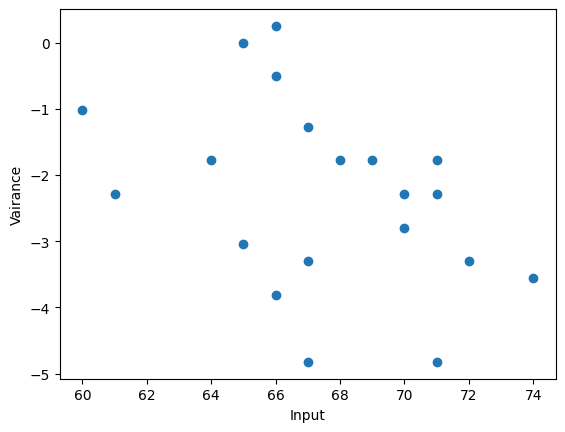

In [89]:
plt.scatter(x = Student_Performance_Tracker["Exam_Score"], y = Variance_data)
plt.xlabel("Input")
plt.ylabel("Vairance")
plt.show()

## 6.Zero Residual Mean

**The relation between input and prediction**

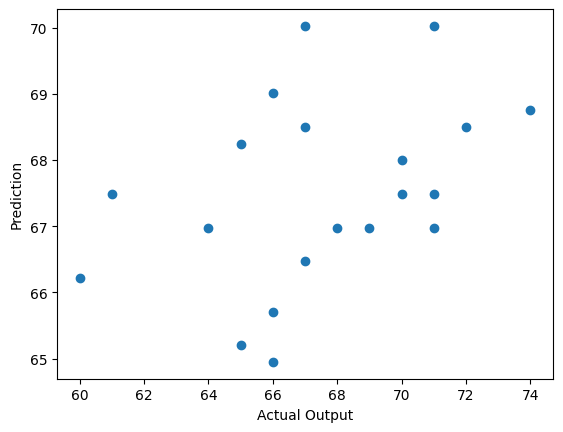

In [90]:
plt.scatter(x =Student_Performance_Tracker["Exam_Score"] ,y = Marks  )
plt.xlabel("Actual Output")
plt.ylabel("Prediction")
plt.show()

## 8.Model Deployment

In [91]:
Linear_Model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [116]:
from pickle import dump

In [121]:
dump(Linear_Model,open("Exam_score_predictor.pkl","wb"))

In [122]:
from pickle import load

In [123]:
Loaded_intelligence = load(open("Exam_score_predictor.pkl","rb"))

In [125]:
Loaded_intelligence.predict(first_test)

C:\Users\jagan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65.20296821, 67.74112488, 75.35559491, 69.01020322, 63.93388987])